In [1]:
#Machine Learning program: Classifies individuals as either having Heart Disease or not.

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [21]:
#Load the data into a variable
data2= pd.read_csv("C:/Users/44793/Downloads/cardio_train.csv/cardio_train.csv",sep=';', header=0)

In [24]:
#Print the first 5 rows of the data
data2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [27]:
#Get the shape of the data.
data2.shape

(70000, 13)

In [28]:
#Count the empty values in each column
data2.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [30]:
data2.isnull().values.any()

False

In [31]:
#View statistics of the data
data2.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
#Get count of individuals w. cardiovascular disease and without
data2['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

C:\Users\44793\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

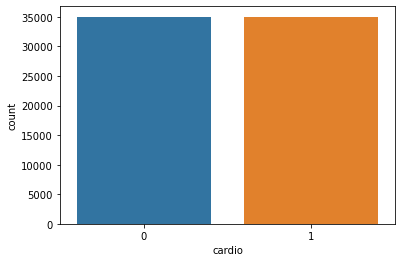

In [34]:
#Visualize the count
sns.countplot(data2['cardio'])

<AxesSubplot:xlabel='years', ylabel='count'>

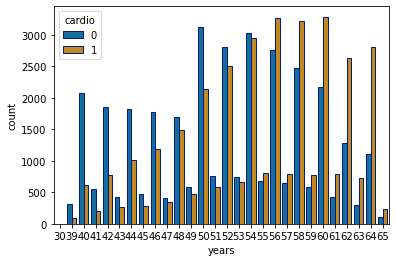

In [39]:
#Look at number of people with cardiovascular disease that exceed number of people without a cardiovascular disease.
#create a years column
data2['years']= (data2['age']/365).round(0)
data2['years']=pd.to_numeric(data2['years'],downcast='integer')

#Visualize the data
sns.countplot(x='years', hue='cardio', data= data2, palette= 'colorblind', edgecolor=sns.color_palette('dark',n_colors=1))

In [40]:
#Get correlation of the columns
data2.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


<AxesSubplot:>

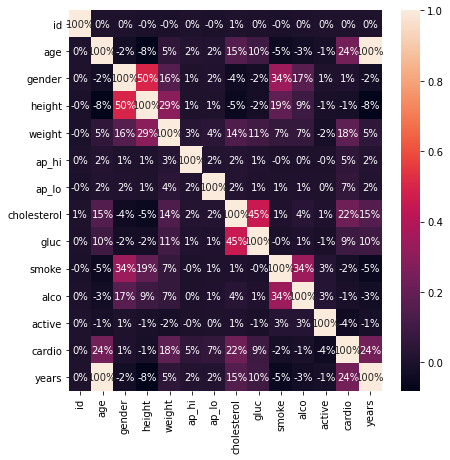

In [42]:
#Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(data2.corr(), annot=True, fmt='.0%')

In [43]:
#Remove or drop the years column
data2=data2.drop('years', axis=1)

In [44]:
#Remove or drop the id columnn
data2=data2.drop('id',axis=1)

In [47]:
#Split the data into feature data & target data
X=data2.iloc[:,:-1].values
Y=data2.iloc[:,-1].values

In [48]:
#Split the data again, into 75% training & 25% testing dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.25, random_state=1)

In [49]:
#Feature scaling
#Scale the values in the data between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [51]:
#Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=1)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [52]:
#Test the models accuracy on training dataset
model=forest
model.score(X_train,Y_train)

0.979904761904762

In [54]:
 #Test the models accuracy on test dataset
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, model.predict(X_test))
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

#Print the confusion matrix
print(cm)

#Print the models accuracy on the test data
print('Model test accuracy={}'.format((TP+TN)/(TP+TN+FN+FP)))

[[6589 2020]
 [3349 5542]]
Model test accuracy=0.6932
